In [23]:
# import tidy format data CSV
# run PCA-->kmeans without spatial data (ie X,Y,Z coords)
# plot PCA and kmeans 

import pandas as pd

# Load the CSV file
# pathname = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham leak analysis/scripts/matlab-copy/September 2024/'
# filename = 'analysisData_091724.csv'
# df = pd.read_csv(pathname+filename)

# pathname = '/Users/jcoleman/Documents/GitHub/NMCoop_Shared/#Pizzi/'
# pathname = '/Users/jcoleman/Documents/GitHub/NMCoop_Shared/#Pizzi/results/data3/'
pathname = '/Users/jcoleman/Documents/GitHub/NMCoop_Shared/#Pizzi/notebooks/'
# filename = 'df_forpca.csv' # 'df_for_pca_clean_noXYZ.csv'
# filename = 'df_for_pca_clean.csv' #w/ XYZ
# df_for_pca = pd.read_csv(pathname+filename)

# print(df_for_pca['Z'])
# print(df_for_pca.shape)

filename = 'df_forPCA_withIDs.csv' #'df_pca_withIDs.csv' 
df_for_pca_IDs = pd.read_csv(pathname+filename)
# df_for_pca_IDs = df_for_pca.copy() # trying to get group and vessel IDs encoded -s ee boxplot data?
df_for_pca_IDs['group'] = df_for_pca_IDs['group'].map({'A': 1, 'B': 2})

print(df_for_pca_IDs['group'])
print(df_for_pca_IDs.shape)




0      1
1      1
2      1
3      1
4      1
      ..
185    2
186    2
187    2
188    2
189    2
Name: group, Length: 190, dtype: int64
(190, 25)


In [50]:
df_for_pca_IDs.head

<bound method NDFrame.head of                                                  rowID  meanFWHM  stdevFWHM  \
0     ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_01  3.740378   0.120027   
1     ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_02  4.100067   0.120158   
2     ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_03  6.326261   0.091814   
3     ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_04  6.066305   0.070735   
4     ZT10_16X6x_gg_800nm_m6_roi1_00001_ROIs_classA_01  5.886713   0.134211   
..                                                 ...       ...        ...   
185  ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_14  5.816519   0.107876   
186  ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_15  4.390754   0.234357   
187  ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_16  4.813701   0.139542   
188  ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_17  4.484175   0.177509   
189  ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_18  4.959572   0.172043   

      minFWHM   maxFW

In [49]:
# # dfTable = pd.read_table(pathname+filename)

# # print(dfTable.head())

# # Start with your original DataFrame
# df_temp = df_for_pca_IDs.copy()

# # # Ensure NaNs are converted to 0
# # df_temp[['capLogical', 'venLogical', 'artLogical']] = df_temp[['capLogical', 'venLogical', 'artLogical']].fillna(0)

# # # print(df_temp.max())

# # # Directly multiply each logical column by its respective factor
# # df_temp['capLogical'] = df_temp['capLogical'] * 1
# # df_temp['venLogical'] = df_temp['venLogical'] * 2
# # df_temp['artLogical'] = df_temp['artLogical'] * 3

# # # Now, sum the values across the three logical columns row-wise
# # df_sum = df_temp[['capLogical', 'venLogical', 'artLogical']].sum(axis=1).to_frame('totalLogical')

# # # Output the result
# # print(df_sum.max())
# # print(df_sum)


# # # print(df_temp['capLogical'].max())
# # # print(df_temp['venLogical'])
# # # print(df_temp['artLogical'])
# # print(df_sum['totalLogical'])

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Ensure there are no duplicated rows/indices
# final_df = final_df.drop_duplicates()

# # Plotting each vessel type with boxplots, ensuring values are not duplicated
# # g = sns.catplot(
#     x='group', 
#     y='metric1', 
#     hue='vessel_type', 
#     data=final_df[final_df['vessel_type'].isin(['capillary', 'venule', 'arteriole'])], 
#     kind='box', 
#     width=0.5,  # Adjust boxplot width (~50-70% of original)
#     dodge=True  # Add gap between vessel types
# )

# # Customize the plot
# g.set_axis_labels("Group", "Metric1")
# g.add_legend(title="Vessel Type")
# plt.show()


In [25]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

def perform_pca(data, n_components=2):
    """
    Perform PCA on the provided data and return the PCA transformed data.
    
    Parameters:
    data (DataFrame or ndarray): Input data for PCA.
    n_components (int): Number of principal components to return.
    
    Returns:
    DataFrame: PCA transformed data with specified number of components.
    """
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_scaled)
    
    # Convert to DataFrame
    columns = [f'PC{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=principal_components, columns=columns)
    
    return pca_df

from sklearn.cluster import KMeans

def perform_kmeans(pca_data, n_clusters=3):
    """
    Perform K-means clustering on the PCA transformed data.
    
    Parameters:
    pca_data (DataFrame or ndarray): PCA transformed data.
    n_clusters (int): Number of clusters for K-means.
    
    Returns:
    DataFrame: Original PCA data with an additional 'Cluster' column for K-means results.
    """
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(pca_data)
    
    pca_data['Cluster'] = clusters
    
    return pca_data

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_pca(pca_data, title='PCA Results'):
    """
    Plot the PCA results.
    
    Parameters:
    pca_data (DataFrame): PCA transformed data with optional 'group' column for color-coding.
    title (str): Title of the plot.
    """
    
    colors = ['red', 'black']
    cmap = ListedColormap(colors)
    bounds = [0.5, 1.5, 2.5]
    norm = BoundaryNorm(bounds, len(colors))   
    
    plt.figure(figsize=(8, 6))
    if 'group' in pca_data.columns:
#         scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['group'], cmap='viridis', alpha=0.7)
        scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['group'],
                              cmap=cmap, norm=norm, alpha=0.7)

        plt.colorbar(scatter, label='Group')
    else:
        plt.scatter(pca_data['PC1'], pca_data['PC2'], alpha=0.7)
        
    plt.xlim(-7, 7)  # Match x-axis range
    plt.ylim(-5, 15)  # Match -axis range
    
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.show()

def plot_kmeans(pca_data, pca_metadata, title='K-means Clustering Results'):
    """
    Plot the K-means clustering results.
    
    Parameters:
    pca_data (DataFrame): PCA transformed data with 'Cluster' column for K-means results.
    title (str): Title of the plot.
    """
    
#     get color code from group or logicals using - pca_metadata input
    plt.figure(figsize=(8, 6))
#     scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Cluster'], cmap='viridis', alpha=0.7)
    scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_metadata, cmap='viridis', alpha=0.7)

    # pca_colors
    plt.colorbar(scatter, label='Cluster')
#     plt.colorbar(scatter, label='Group')
#     plt.colorbar(scatter, label='Vessel type')

    
    plt.xlim(-7, 7)  # Match x-axis range
    plt.ylim(-5, 15)  # Match -axis range
    
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.show()

def plot_kmeans_capVenArt(pca_data, pca_metadata, title='K-means Clustering Results'):
    """
    Plot the K-means clustering results with vessel type coloring and custom legend.
    
    Parameters:
    pca_data (DataFrame): Must contain 'PC1' and 'PC2'.
    pca_metadata (list or Series): List of RGB color tuples for each point.
    title (str): Plot title.
    """
    
    plt.figure(figsize=(8, 6))
    
    # Scatter with color values passed in (RGB tuples)
    scatter = plt.scatter(
        pca_data['PC1'], pca_data['PC2'],
        c=pca_metadata,
        alpha=0.7
    )

    # Optional colorbar: remove this if using RGB values (won’t work well with RGB)
    # plt.colorbar(scatter, label='Cluster')

    plt.xlim(-7, 7)
    plt.ylim(-5, 15)

    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)

    # Add custom legend (static map of vessel types to colors)
    color_map = {
        (True, False, False): (0.26, 0.59, 0.86),  # Capillary
        (False, True, False): (0.86, 0.93, 0.23),  # Venule
        (False, False, True): (0.99, 0.43, 0.24),  # Arteriole
    }

    legend_elements = [
        Patch(facecolor=color_map[(True, False, False)], edgecolor='k', label='Capillary'),
        Patch(facecolor=color_map[(False, True, False)], edgecolor='k', label='Venule'),
        Patch(facecolor=color_map[(False, False, True)], edgecolor='k', label='Arteriole')
    ]
    plt.legend(handles=legend_elements, title='Vessel Type')

    plt.tight_layout()
    plt.show()

    
def plot_kmeans_custom(pca_data, pca_metadata, colors, title='K-means Clustering Results'):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    import numpy as np

    # Define the color map dictionary
    color_map = {
        (True, False, False): (0.26, 0.59, 0.86),  # capillary (0.26, 0.59, 0.86)
        (False, True, False): (0.86, 0.93, 0.23),  # venule (0.86, 0.93, 0.23)
        (False, False, True): (0.99, 0.43, 0.24),  # arteriole (0.99, 0.43, 0.24)
    }

    # Example pca_metadata with logicals (you will replace this with your actual metadata)
    # pca_metadata example (logical columns or group values)
    pca_metadata = [
        (True, False, False),  # capillary
        (False, True, False),  # venule
        (False, False, True),  # arteriole
        (True, False, False),  # capillary again
    ]

    # Get color for each logical group based on the `color_map`
    colors = [color_map[tuple(group)] for group in pca_metadata]

    # Create a custom colormap (optional, in case you want to use it for other plots)
    cmap = ListedColormap([color_map[key] for key in color_map])

    # Example pca_data (randomly generated for this example)
    pca_data = {'PC1': np.random.rand(4), 'PC2': np.random.rand(4)}

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=colors, alpha=0.7)

    # Step 2: Add custom legend for the groups
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[(True, False, False)], markersize=10, label='Capillary'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[(False, True, False)], markersize=10, label='Venule'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[(False, False, True)], markersize=10, label='Arteriole')
    ]
    
    plt.xlim(-7, 7)  # Match x-axis range
    plt.ylim(-5, 15)  # Match x-axis range

    plt.legend(handles=handles, title="Vessel Types")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.title(title)

    plt.show()






In [26]:
# DATA MASK

# Assuming 'data' is your original DataFrame without target columns
# numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns #imputed_df.select_dtypes(include=['int64', 'float64']).columns
# df_for_pca = new_df[numeric_cols]#imputed_df[numeric_cols]
# df_for_pca_clean = df_for_pca.dropna()
# headers_for_pca = ['meanFWHM', 'stdevFWHM', 'minFWHM', 'maxFWHM', 'meanFeFv', 'stdevFeFv', 'minFeFv', 'maxFeFv', 'Z']
headers_for_pca = ['meanFWHM', 'stdevFWHM', 'minFWHM', 'maxFWHM', 'meanPvLeak', 'stdevPvLeak', 'minPvLeak', 'maxPvLeak'] #, 'X', 'Y', 'Z']


# df_for_pca_clean = df_for_pca.copy()[headers_for_pca]
df_for_pca_clean = df_for_pca_IDs.copy()[headers_for_pca]

print(df_for_pca_clean)

pca_data = perform_pca(df_for_pca_clean)

# print(numeric_cols)
# print(imputed_df)
print(df_for_pca.shape)
print(df_for_pca_clean.shape)



# pca_data_with_clusters = perform_kmeans(pca_data, n_clusters=3)

# plot_pca(pca_data_with_clusters, title='PCA with Groups')
# plot_kmeans(pca_data_with_clusters, title='K-means Clustering Results')

     meanFWHM  stdevFWHM   minFWHM   maxFWHM  meanPvLeak  stdevPvLeak  \
0    3.740378   0.120027  3.542297  3.907355    0.724227     0.008986   
1    4.100067   0.120158  3.922870  4.245508    0.739692     0.001860   
2    6.326261   0.091814  6.202881  6.441604    0.678211     0.020652   
3    6.066305   0.070735  5.974274  6.145408    0.742717     0.001182   
4    5.886713   0.134211  5.693535  6.101866    0.710036     0.008617   
..        ...        ...       ...       ...         ...          ...   
185  5.816519   0.107876  5.646091  5.990243    0.698325     0.016333   
186  4.390754   0.234357  4.028063  4.724228    0.741372     0.000951   
187  4.813701   0.139542  4.588607  4.998082    0.731381     0.003403   
188  4.484175   0.177509  4.274866  4.828402    0.730822     0.003938   
189  4.959572   0.172043  4.645450  5.130429    0.733686     0.002674   

     minPvLeak  maxPvLeak  
0     0.706560   0.734500  
1     0.735732   0.741959  
2     0.639518   0.710663  
3     0.740

NameError: name 'df_for_pca' is not defined

In [27]:
print(pca_data)

           PC1       PC2
0     2.721484 -2.730715
1    -0.485033 -0.856004
2    11.864979 -4.279776
3    -0.308234  1.096731
4     5.122007 -1.549533
..         ...       ...
185   8.877859 -3.404015
186  -0.756414 -0.311109
187   1.387295 -0.957998
188   1.304489 -1.169359
189   0.877053 -0.570562

[190 rows x 2 columns]


In [28]:
pca_data_with_clusters = perform_kmeans(pca_data, n_clusters=3)

In [29]:
print(pca_data_with_clusters)
pca_data_with_clusters['Cluster']

           PC1       PC2  Cluster
0     2.721484 -2.730715        1
1    -0.485033 -0.856004        2
2    11.864979 -4.279776        1
3    -0.308234  1.096731        0
4     5.122007 -1.549533        1
..         ...       ...      ...
185   8.877859 -3.404015        1
186  -0.756414 -0.311109        2
187   1.387295 -0.957998        2
188   1.304489 -1.169359        2
189   0.877053 -0.570562        2

[190 rows x 3 columns]


0      1
1      2
2      1
3      0
4      1
      ..
185    1
186    2
187    2
188    2
189    2
Name: Cluster, Length: 190, dtype: int32

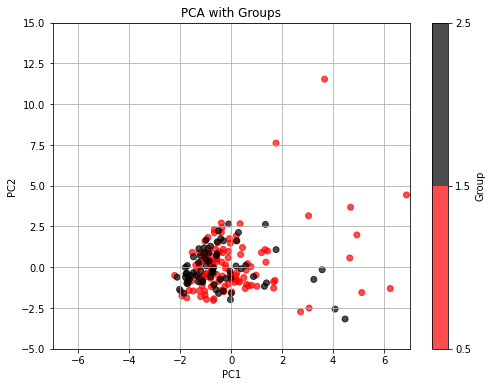

In [30]:
# pca_data_with_clusters['group'] = df_for_pca['group']
pca_data_with_clusters = pca_data_with_clusters.merge(df_for_pca_IDs[['group']], 
                                                      left_index=True, 
                                                      right_index=True)
# black = B-SHAM; red = A-rmTBI
plot_pca(pca_data_with_clusters, title='PCA with Groups')

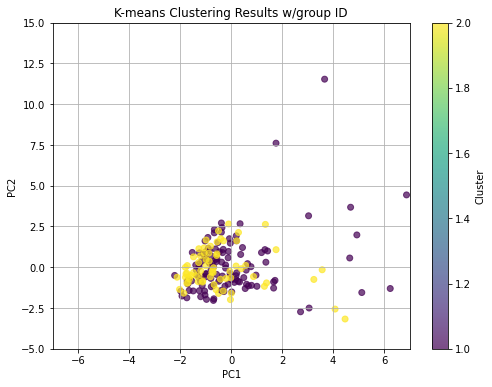

In [31]:
color_source = df_for_pca_IDs['group']
# print(color_source)
plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/group ID')

In [32]:
# color_source = df_for_pca_IDs['capLogical']
# # print(color_source)
# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/capLogical')

In [33]:
# color_source = df_for_pca_IDs['venLogical']
# # print(color_source)
# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/venLogical')

In [34]:
# color_source = df_for_pca_IDs['artLogical']
# # print(color_source)
# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/artLogical')

In [35]:
# color_source = df_for_pca_IDs['midCapLogical']
# # print(color_source)
# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/preLogical')

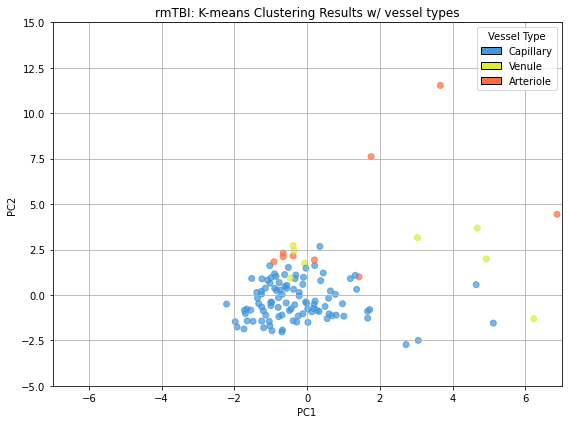

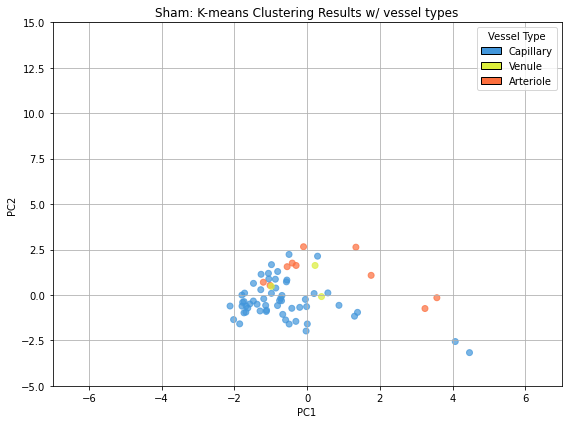

In [37]:
# color_source = df_for_pca_IDs['preCapLogical']
# print(color_source)
# Define color map
# color_map = {
#     (True, False, False): 'red',  # capillary
#     (False, True, False): 'green',  # venule
#     (False, False, True): 'blue',  # arteriole
# }
color_map = {
    (True, False, False): (0.26, 0.59, 0.86),  # capillary (252, 237, 99)
    (False, True, False): (0.86, 0.93, 0.23),  # venule (0.86, 0.93, 0.23)
    (False, False, True): (0.99, 0.43, 0.24),  # arteriole (0.99, 0.43, 0.24)
}

# Convert logical values to colors
colors = [color_map[tuple(x)] for x in zip(df_for_pca_IDs['capLogical'], 
                                            df_for_pca_IDs['venLogical'], 
                                            df_for_pca_IDs['artLogical'])]
colors_df = pd.Series(colors)

# df_output1c = df_output[['rowID'] + headers_to_extract]
colors_A = colors_df[df_for_pca_IDs['group'] == 1]
colors_B = colors_df[df_for_pca_IDs['group'] == 2]


pca_data_with_clusters_PLOTA  = pca_data_with_clusters[df_for_pca_IDs['group'] == 1]
pca_data_with_clusters_PLOTB  = pca_data_with_clusters[df_for_pca_IDs['group'] == 2]


# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/ preCapLogical')
plot_kmeans_capVenArt(pca_data_with_clusters_PLOTA, colors_A, title='rmTBI: K-means Clustering Results w/ vessel types')
plot_kmeans_capVenArt(pca_data_with_clusters_PLOTB, colors_B, title='Sham: K-means Clustering Results w/ vessel types')
# print(colors_A)


In [38]:
# # color_source = df_for_pca_IDs['preCapLogical']
# # print(color_source)
# # Define color map
# # color_map = {
# #     (True, False, False): 'red',  # capillary
# #     (False, True, False): 'green',  # venule
# #     (False, False, True): 'blue',  # arteriole
# # }
# color_map = {
#     (True, False, False): (0.26, 0.59, 0.86),  # capillary (0.26, 0.59, 0.86)
#     (False, True, False): (0.86, 0.93, 0.23),  # venule (0.86, 0.93, 0.23)
#     (False, False, True): (0.99, 0.43, 0.24),  # arteriole (0.99, 0.43, 0.24)
# }

# # Convert logical values to colors
# colors = [color_map[tuple(x)] for x in zip(df_for_pca_IDs['capLogical'], 
#                                             df_for_pca_IDs['venLogical'], 
#                                             df_for_pca_IDs['artLogical'])]
# colors_df = pd.Series(colors)

# # df_output1c = df_output[['rowID'] + headers_to_extract]
# colors_A = colors_df[df_for_pca_IDs['group'] == 1]
# colors_B = colors_df[df_for_pca_IDs['group'] == 2]


# pca_data_with_clusters_PLOTA  = pca_data_with_clusters[df_for_pca_IDs['group'] == 1]
# pca_data_with_clusters_PLOTB  = pca_data_with_clusters[df_for_pca_IDs['group'] == 2]


# # plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/ preCapLogical')
# plot_kmeans(pca_data_with_clusters_PLOTB, colors_B, title='SHAM: K-means Clustering Results w/ vessel types')
# # plot_kmeans(pca_data_with_clusters_PLOTA, colors_A, title='rmTBI: K-means Clustering Results w/ vessel types')
# # print(colors_A)


In [39]:
print(pca_data_with_clusters.head())

# Add logicals for plotting color schemes
pca_data_with_clusters = pca_data_with_clusters.merge(df_for_pca_IDs[['preCapLogical','midCapLogical','pstCapLogical']], 
                                                      left_index=True, 
                                                      right_index=True)

print(pca_data_with_clusters.head())

         PC1       PC2  Cluster  group
0   2.721484 -2.730715        1      1
1  -0.485033 -0.856004        2      1
2  11.864979 -4.279776        1      1
3  -0.308234  1.096731        0      1
4   5.122007 -1.549533        1      1
         PC1       PC2  Cluster  group  preCapLogical  midCapLogical  \
0   2.721484 -2.730715        1      1            0.0            1.0   
1  -0.485033 -0.856004        2      1            1.0            0.0   
2  11.864979 -4.279776        1      1            0.0            1.0   
3  -0.308234  1.096731        0      1            1.0            0.0   
4   5.122007 -1.549533        1      1            0.0            1.0   

   pstCapLogical  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


In [43]:
# PLOT W/ CAP POSITION

# color_source = df_for_pca_IDs['preCapLogical']
# print(color_source)
# Define color map
# color_map = {
#     (True, False, False): 'red',  # capillary
#     (False, True, False): 'green',  # venule
#     (False, False, True): 'blue',  # arteriole
# }
color_map = {
    (True, False, False): (0.26, 0.59, 0.86),  # capillary (252, 237, 99)
    (False, True, False): (0.86, 0.93, 0.23),  # venule (0.86, 0.93, 0.23)
    (False, False, True): (0.99, 0.43, 0.24),  # arteriole (0.99, 0.43, 0.24)
}

# Convert logical values to colors
# colors = [color_map[tuple(x)] for x in zip(df_for_pca_IDs['preCapLogical'], 
#                                             df_for_pca_IDs['midCapLogical'], 
#                                             df_for_pca_IDs['pstCapLogical'])]

colors = [color_map[tuple(x)] for x in zip(pca_data_with_clusters['preCapLogical'], 
                                            pca_data_with_clusters['midCapLogical'], 
                                            pca_data_with_clusters['pstCapLogical']) 
          if any(y != 0.0 for y in x)]

# colors_df = pd.Series(colors)
colors_df = pd.Series(colors, name='colors')
colors_df = colors_df.reset_index(drop=True)
# print(colors_df.shape)
# print(colors_df)

filtered_df = pca_data_with_clusters[
    (pca_data_with_clusters['preCapLogical'] == True) |
    (pca_data_with_clusters['midCapLogical'] == True) |
    (pca_data_with_clusters['pstCapLogical'] == True)]

filtered_df = pd.merge(filtered_df, colors_df, left_index=True, right_index=True)

print(filtered_df.shape)
print(pca_data_with_clusters.shape)
print(colors_df.shape)
# print(pca_data_with_clusters_GRP1.shape)
# print(colors_1.shape)


(135, 8)
(190, 7)
(158,)


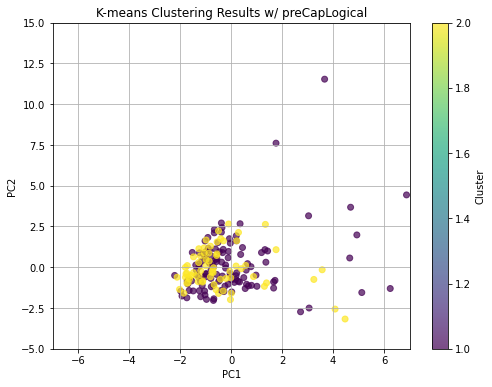

In [46]:
pca_data_with_clusters_GRP1 = filtered_df[filtered_df['group'] == 1]
pca_data_with_clusters_GRP1 = pca_data_with_clusters_GRP1.reset_index(drop=True)
colors_1 = pca_data_with_clusters_GRP1['colors']
# colors_2 = colors_df[pca_data_with_clusters_GRP2['group'] == 2]

# # print(pca_data_with_clusters_PLOTB.shape)

# pca_data_with_clusters_PLOTB = pca_data_with_clusters_PLOTB.loc[~((df_for_pca_IDs['preCapLogical'] == 0) & 
#                                       (df_for_pca_IDs['midCapLogical'] == 0) & 
#                                       (df_for_pca_IDs['pstCapLogical'] == 0))]
# print(pca_data_with_clusters_PLOTB.shape)
# print(colors_B.shape)

plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/ preCapLogical')
# plot_kmeans(pca_data_with_clusters_GRP1, colors_1, title='rmTBI: K-means Clustering Results w/ CAP POSITION')
# plot_kmeans(pca_data_with_clusters_GRP2, colors_2, title='Sham: K-means Clustering Results w/ CAP POSITION')
# plot_kmeans(pca_data_with_clusters_PLOTB, colors_B, title='Sham: K-means Clustering Results w/ vessel types')
# # print(colors_A)

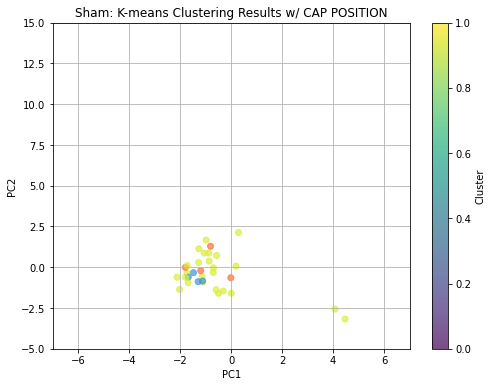

In [110]:
pca_data_with_clusters_GRP2 = filtered_df[filtered_df['group'] == 2]
pca_data_with_clusters_GRP2 = pca_data_with_clusters_GRP2.reset_index(drop=True)
colors_2 = pca_data_with_clusters_GRP2['colors']
# colors_2 = colors_df[pca_data_with_clusters_GRP2['group'] == 2]

# # print(pca_data_with_clusters_PLOTB.shape)

# pca_data_with_clusters_PLOTB = pca_data_with_clusters_PLOTB.loc[~((df_for_pca_IDs['preCapLogical'] == 0) & 
#                                       (df_for_pca_IDs['midCapLogical'] == 0) & 
#                                       (df_for_pca_IDs['pstCapLogical'] == 0))]
# print(pca_data_with_clusters_PLOTB.shape)
# print(colors_B.shape)

# # plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/ preCapLogical')
# plot_kmeans(pca_data_with_clusters_GRP1, colors_1, title='rmTBI: K-means Clustering Results w/ CAP POSITION')
plot_kmeans(pca_data_with_clusters_GRP2, colors_2, title='Sham: K-means Clustering Results w/ CAP POSITION')
# plot_kmeans(pca_data_with_clusters_PLOTB, colors_B, title='Sham: K-means Clustering Results w/ vessel types')
# # print(colors_A)

In [ ]:
# color_source = df_for_pca_IDs['capLogical', 'venLogical', 'artLogical']
# # print(color_source)
# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/ vessel types')

In [ ]:
# % plot PC1 v PC2 etc - overlay group, vessel type
# remove X, Y, Z - redo Fe/Fv w/ background ROIs/dff?